In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [0]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot,cmap="YlGnBu", fmt='', ax=ax)
    plt.savefig('/content/drive/My Drive/Colab Notebooks/data/'+filename+'.png',dpi=300, bbox_inches='tight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Using SVM - 70% - train and 30% - test**

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")

In [0]:
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))


In [0]:
y_train = x_train["Activity"]
y_test = x_test["Activity"]

In [0]:
subject_train = x_train["subject"]
subject_test = x_test["subject"]

In [0]:
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)

In [9]:
clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf.score(x_train,y_train)

0.9790533188248096

In [11]:
clf.score(x_test,y_test)

0.9504580929759077

**Using SVM - 70% - train and 30% - test using LDA**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)

In [0]:
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_test, y_train_test)
x_train_test = clf.transform(x_train_test)

In [0]:
x_train = x_train_test[:7352]
x_test = x_train_test[7352:]
y_train = y_train_test[:7352]
y_test = y_train_test[7352:]

In [16]:
clf = svm.SVC(gamma="scale",kernel="rbf")
clf.fit(x_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
clf.score(x_train,y_train)

0.98449401523395

In [18]:
clf.score(x_test,y_test)

0.9847302341364099

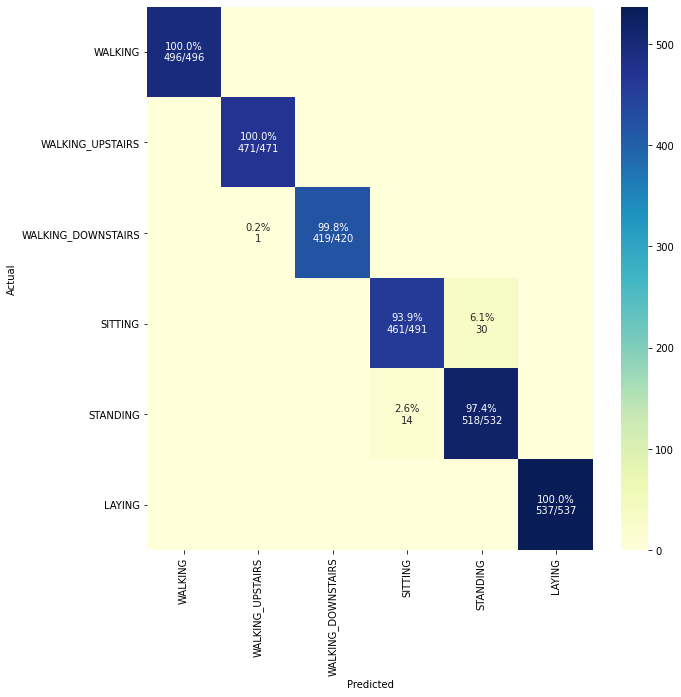

In [19]:
cm_analysis(y_test, clf.predict(x_test), "svm_lda", ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])

**Using SVM - 60% - train, 20 % validation and 20% - test**

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_test, y_train_test)
x_train_test = clf.transform(x_train_test)

In [0]:
x_train = x_train_test[:6180]
x_val = x_train_test[6180:8240]
x_test = x_train_test[8240:]
y_train = y_train_test[:6180]
y_val = y_train_test[6180:8240]
y_test = y_train_test[8240:]

In [22]:
clf = svm.SVC(gamma="scale")
clf.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
clf.score(x_train,y_train)

0.9844660194174757

In [24]:
clf.score(x_val,y_val)

0.987378640776699

In [25]:
clf.score(x_test,y_test)

0.982030111704711

**Using CNN**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
x_train_test = np.array(x_train_test)
y_train_test = np.array(y_train_test)

In [0]:
for i in range(y_train_test.shape[0]):
  if y_train_test[i]=="WALKING":
    y_train_test[i] = 0
  elif y_train_test[i]=="WALKING_UPSTAIRS":
    y_train_test[i] = 1
  elif y_train_test[i]=="WALKING_DOWNSTAIRS":
    y_train_test[i] = 2
  elif y_train_test[i]=="SITTING":
    y_train_test[i] = 3
  elif y_train_test[i]=="STANDING":
    y_train_test[i] = 4
  elif y_train_test[i]=="LAYING":
    y_train_test[i] = 5

In [28]:
    from keras.utils import to_categorical
    y_train_test = to_categorical(y_train_test)

Using TensorFlow backend.


In [0]:
x_train = x_train_test[:6180]
x_val = x_train_test[6180:8240]
x_test = x_train_test[8240:]
y_train = y_train_test[:6180]
y_val = y_train_test[6180:8240]
y_test = y_train_test[8240:]
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [31]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.regularizers import l2
import os

batch_size = 32
num_classes = 6
epochs = 10
model = Sequential()
model.add(Conv1D(32, 3, padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                 input_shape=(561,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

"""model.add(Conv1D(64, 3, padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))"""

model.add(Flatten())
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.adam(lr=0.001, decay=0)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6180 samples, validate on 2060 samples
Epoch 1/10





6180/6180 [==============================] - 8s 1ms/step - loss: 0.3862 - acc: 0.8649 - val_loss: 0.1829 - val_acc: 0.9485
Epoch 2/10
6180/6180 [==============================] - 7s 1ms/step - loss: 0.1637 - acc: 0.9494 - val_loss: 0.1423 - val_acc: 0.9544
Epoch 3/10
6180/6180 [==============================] - 7s 1ms/step - loss: 0.1299 - acc: 0.9605 - val_loss: 0.1137 - val_acc: 0.9655
Epoch 4/10
6180/6180 [==============================] - 7s 1ms/step - loss: 0.1091 - acc: 0.9654 - val_loss: 0.0916 - val_acc: 0.9752
Epoch 5/10
6180/6180 [==============================] - 7s 1ms/step - loss: 0.1073 - acc: 0.9663 - val_loss: 0.0946 - val_acc: 0.9709
Epoch 6/10
6180/6180 [==============================] - 7s

In [32]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2059/2059 [==============================] - 1s 261us/step
Test loss: 0.11252926665097258
Test accuracy: 0.9611461874696454


**Using CNN with LDA**

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
yt = y_test
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_test, y_train_test)
x_train_test = clf.transform(x_train_test)
x_train_test = np.array(x_train_test)
y_train_test = np.array(y_train_test)

In [0]:
for i in range(y_train_test.shape[0]):
  if y_train_test[i]=="WALKING":
    y_train_test[i] = 0
  elif y_train_test[i]=="WALKING_UPSTAIRS":
    y_train_test[i] = 1
  elif y_train_test[i]=="WALKING_DOWNSTAIRS":
    y_train_test[i] = 2
  elif y_train_test[i]=="SITTING":
    y_train_test[i] = 3
  elif y_train_test[i]=="STANDING":
    y_train_test[i] = 4
  elif y_train_test[i]=="LAYING":
    y_train_test[i] = 5

In [0]:
from keras.utils import to_categorical
y_train_test = to_categorical(y_train_test)

In [0]:
x_train = x_train_test[:6180]
x_val = x_train_test[6180:8240]
x_test = x_train_test[8240:]
y_train = y_train_test[:6180]
y_val = y_train_test[6180:8240]
y_test = y_train_test[8240:]

In [0]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [38]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.regularizers import l2
import os

batch_size = 32
num_classes = 6
epochs = 10
model = Sequential()
model.add(Conv1D(32, 1, padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                 input_shape=(5,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.25))

model.add(Conv1D(64, 1, padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.adam(lr=0.001, decay=0)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Train on 6180 samples, validate on 2060 samples
Epoch 1/10
6180/6180 [==============================] - 2s 274us/step - loss: 0.7752 - acc: 0.8728 - val_loss: 0.4028 - val_acc: 0.9825
Epoch 2/10
6180/6180 [==============================] - 1s 119us/step - loss: 0.3265 - acc: 0.9723 - val_loss: 0.2383 - val_acc: 0.9816
Epoch 3/10
6180/6180 [==============================] - 1s 120us/step - loss: 0.2072 - acc: 0.9782 - val_loss: 0.1485 - val_acc: 0.9830
Epoch 4/10
6180/6180 [==============================] - 1s 119us/step - loss: 0.1519 - acc: 0.9748 - val_loss: 0.1003 - val_acc: 0.9820
Epoch 5/10
6180/6180 [==============================] - 1s 122us/step - loss: 0.1147 - acc: 0.9764 - val_loss: 0.0817 - val_acc: 0.9811
Epoch 6/10
6180/6180 [==============================] - 1s 118us/step - loss: 0.0964 - acc: 0.9759 - val_loss: 0.0690 - val_acc: 0.9816
Epoch 7/10
6180/6180 [==============================] - 1s 119us/step - loss: 0.0812 - acc: 0.9786 - val_loss: 0.0680 - val_acc: 0.9820


In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2059/2059 [==============================] - 0s 36us/step
Test loss: 0.06371151268547343
Test accuracy: 0.9805730937348227


In [0]:
# To calculate confusion Matrix
y = np.array(model.predict(x_test))
y[y>0.5]=1
y =np.array(y,dtype="int")
yp = []
for i in range(y.shape[0]):
  if y[i][0]==1:
    yp.append("WALKING")
  elif y[i][1]==1:
    yp.append("WALKING_UPSTAIRS")
  elif y[i][2]==1:
    yp.append("WALKING_DOWNSTAIRS")
  elif y[i][3]==1:
    yp.append("SITTING")
  elif y[i][4]==1:
    yp.append("STANDING")
  elif y[i][5]==1:
    yp.append("LAYING")
yp = np.array(yp)

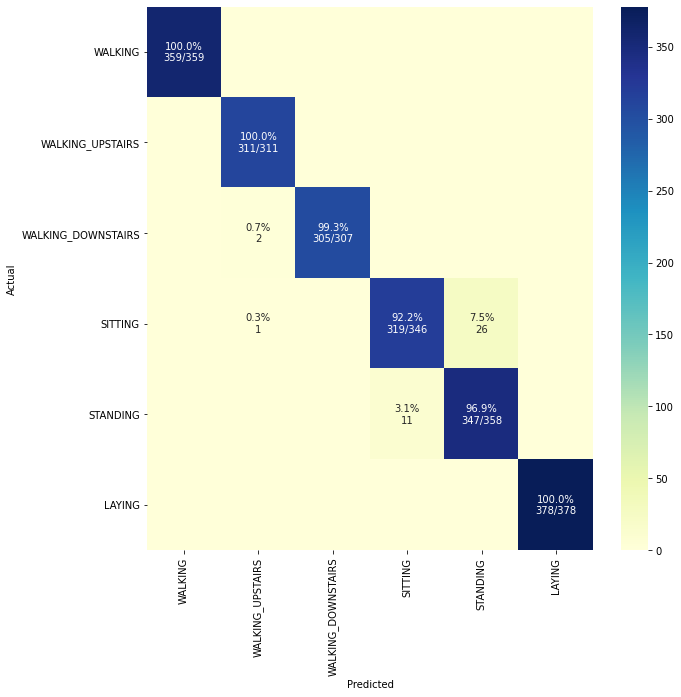

In [41]:
cm_analysis(yt[-2059:], yp, "cnn_lda", ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])

**KNN**

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
neigh.score(x_test,y_test)

0.9002375296912114

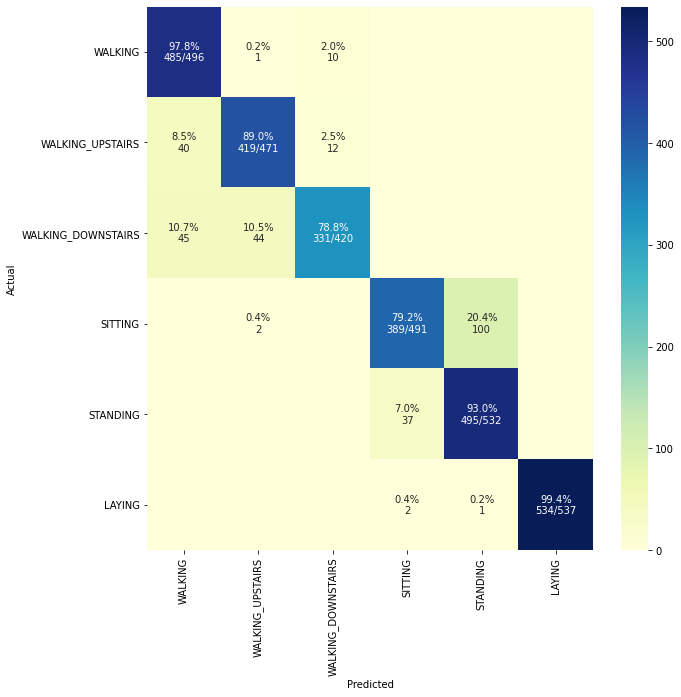

In [45]:
cm_analysis(y_test, neigh.predict(x_test), "knn", ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])

**KNN with LDA**

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
x_train_test = np.array(x_train_test)
y_train_test = np.array(y_train_test)
#standardization
x_train_test = x_train_test - x_train_test.mean(axis=0)
x_train_test = x_train_test / x_train_test.std(axis=0)
#dimension reduction using lda
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_test, y_train_test)
x_train_test = clf.transform(x_train_test)

In [0]:
x_train = x_train_test[:7352]
x_test = x_train_test[7352:]
y_train = y_train_test[:7352]
y_test = y_train_test[7352:]

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
neigh.score(x_test,y_test)

0.9772650152697658

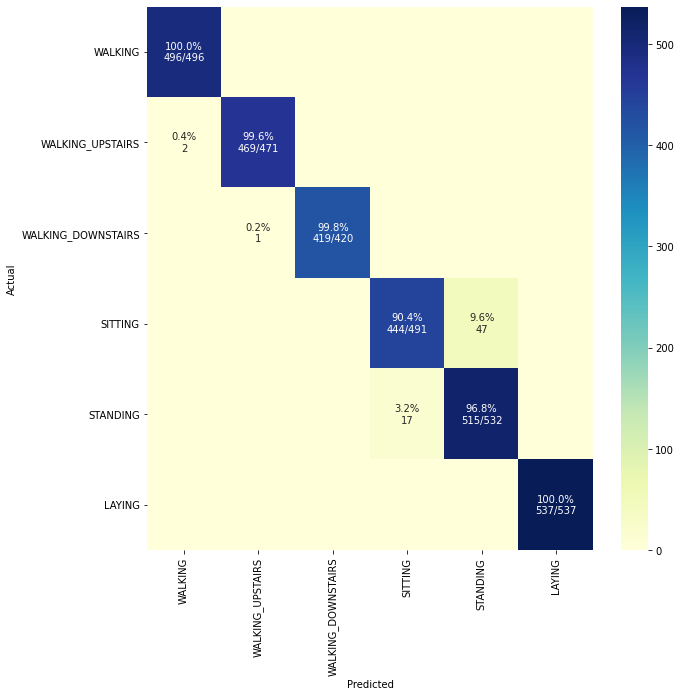

In [50]:
cm_analysis(y_test, neigh.predict(x_test), "knn_lda", ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"])

**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)

In [53]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
clf.score(x_test,y_test)

0.7170003393281303

**Random Forest Classifier with LDA**

In [0]:
x_train = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/train.csv")
x_test = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/test.csv")
x_train = x_train.reindex(np.random.permutation(x_train.index))
x_test = x_test.reindex(np.random.permutation(x_test.index))
y_train = x_train["Activity"]
y_test = x_test["Activity"]
subject_train = x_train["subject"]
subject_test = x_test["subject"]
x_train = x_train.drop(["subject","Activity"],axis=1)
x_test = x_test.drop(["subject","Activity"],axis=1)
x_train_test = x_train.append(x_test)
y_train_test = y_train.append(y_test)
x_train_test = np.array(x_train_test)
y_train_test = np.array(y_train_test)
#standardization
x_train_test = x_train_test - x_train_test.mean(axis=0)
x_train_test = x_train_test / x_train_test.std(axis=0)
#dimension reduction using lda
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_test, y_train_test)
x_train_test = clf.transform(x_train_test)

In [0]:
x_train = x_train_test[:7352]
x_test = x_train_test[7352:]
y_train = y_train_test[:7352]
y_test = y_train_test[7352:]

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
clf.score(x_test,y_test)

0.826942653545979